In [1]:
from environment.models import perfect, simple_control_fixed # type: ignore

import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from tqdm import tqdm # type: ignore

In [2]:
env = simple_control_fixed.SimpleControlledFixedEnv()

# No errors

what


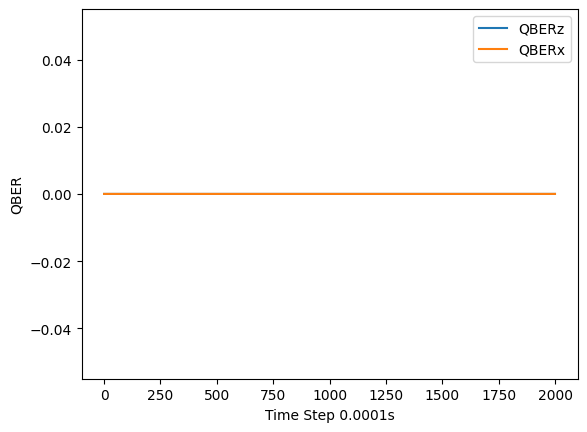

In [3]:
penv = perfect.PerfectEnv()

penv.simulate_no_polar()

QBER = penv.get_QBER()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {penv.delta_t}s')
plt.show()

# No control

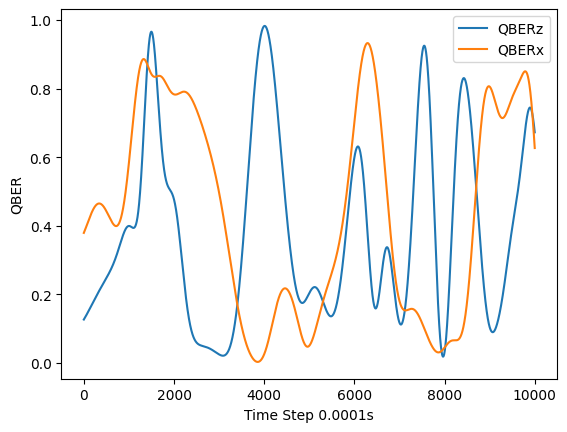

In [4]:
env.max_t = 1
env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

# Fixed angles no control

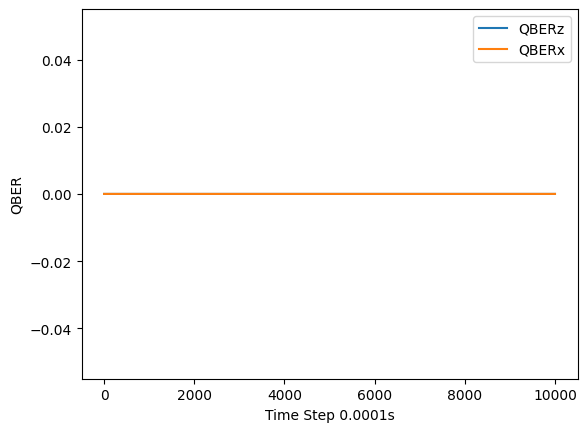

In [5]:
env.fixed_error_ctrl_pump = [0, 0, 0, 0]
env.fixed_error_ctrl_alice = [0, 0, 0, 0]
env.fixed_error_ctrl_bob = [0, 0, 0, 0]
env.fixed_errors_flags = [True, True, True, True, 
                          True, True, True, True, 
                          True, True, True, True]

env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

# Plots for all alternating fixed angles

100%|██████████| 12/12 [00:47<00:00,  3.98s/it]


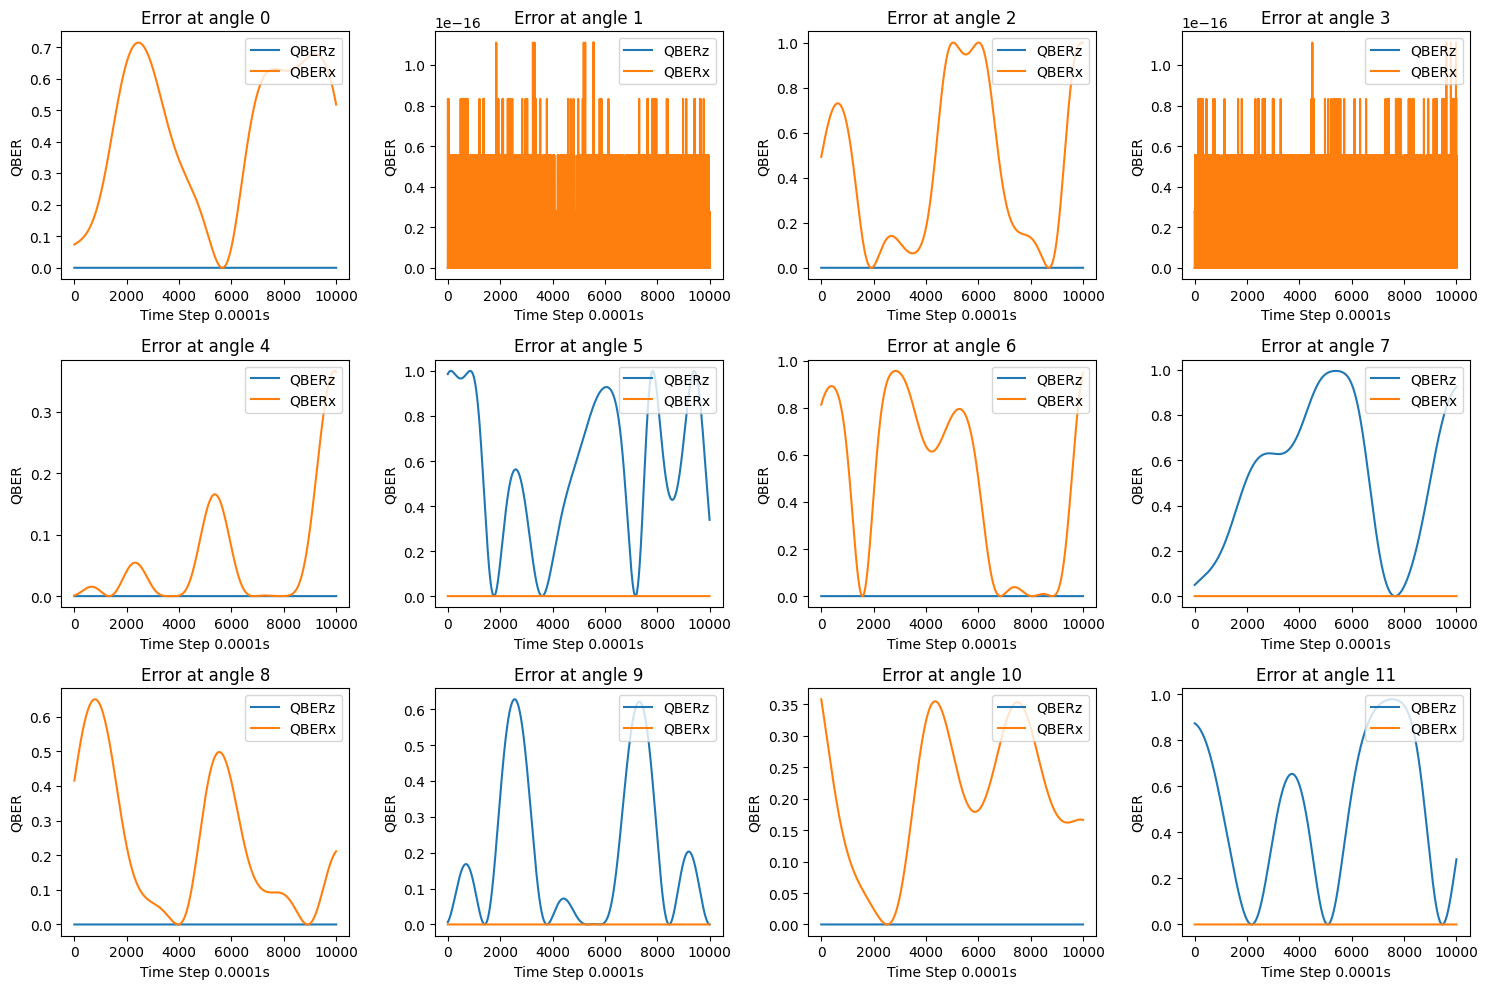

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for i in tqdm(range(12)):
    env.fixed_error_ctrl_pump = [0, 0, 0, 0]
    env.fixed_error_ctrl_alice = [0, 0, 0, 0]
    env.fixed_error_ctrl_bob = [0, 0, 0, 0]

    env.fixed_errors_flags = [True, True, True, True,
                              True, True, True, True,
                              True, True, True, True]
    # Set the error to be random for ith angle
    env.fixed_errors_flags[i] = False

    env.reset()

    while not env.done:
        env.step()

    QBER = env.get_qber()

    row = i // 4
    col = i % 4

    axs[row, col].plot(QBER[:, 0], label='QBERz')
    axs[row, col].plot(QBER[:, 1], label='QBERx')
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(f'Error at angle {i}')
    axs[row, col].set_ylabel('QBER')
    axs[row, col].set_xlabel(f'Time Step {env.delta_t}s')

plt.tight_layout()
plt.show()

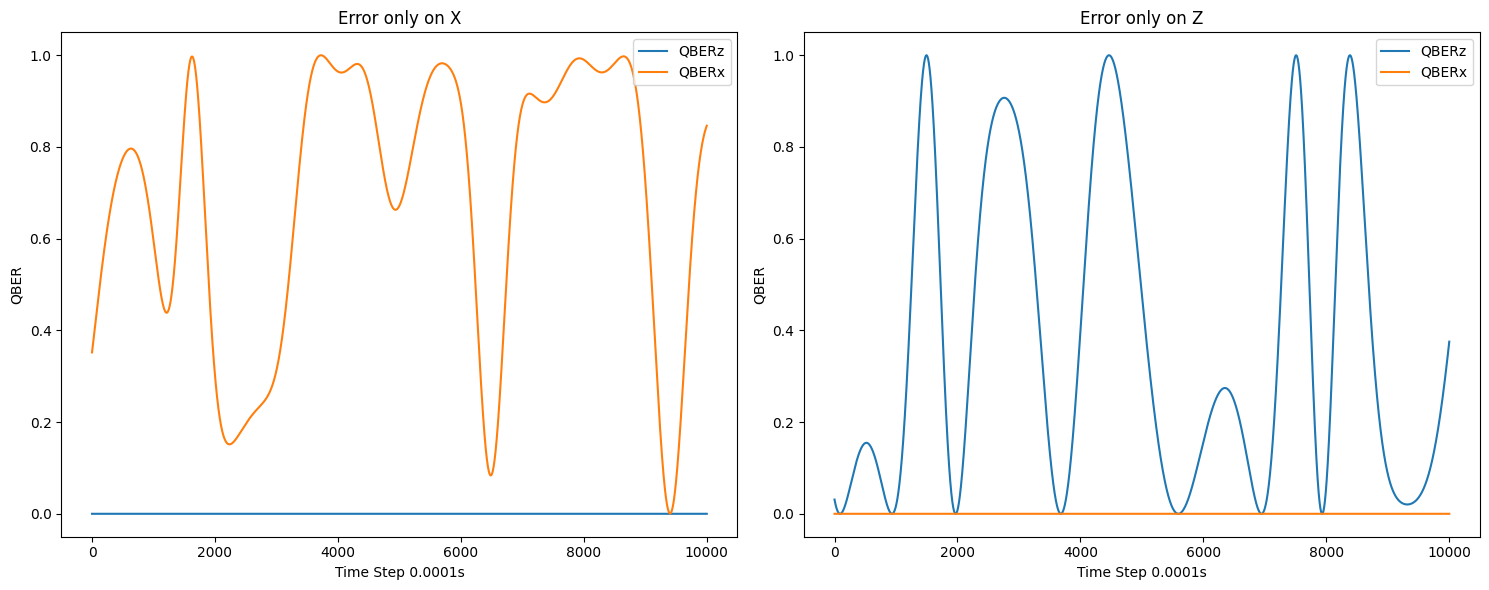

In [7]:
env.fixed_error_ctrl_pump = [0, 0, 0, 0]
env.fixed_error_ctrl_alice = [0, 0, 0, 0]
env.fixed_error_ctrl_bob = [0, 0, 0, 0]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

for i in range(2):
    env.fixed_errors_flags = [False, False, False, False, 
                              False, True, False, True, 
                              False, True, False, True]
    if i == 1:
        env.fixed_errors_flags = ~np.array(env.fixed_errors_flags, dtype=bool)

    env.reset()

    while not env.done:
        env.step()

    QBER = env.get_qber()

    axs[i].plot(QBER[:,0],label='QBERz')
    axs[i].plot(QBER[:,1],label='QBERx')
    axs[i].legend(loc = 'upper right')
    axs[i].set_title(f'Error only on {np.array(["X","Z"])[i]}')
    axs[i].set_ylabel('QBER')
    axs[i].set_xlabel(f'Time Step {env.delta_t}s')

plt.tight_layout()
plt.show()

# Fixed angles inverse control

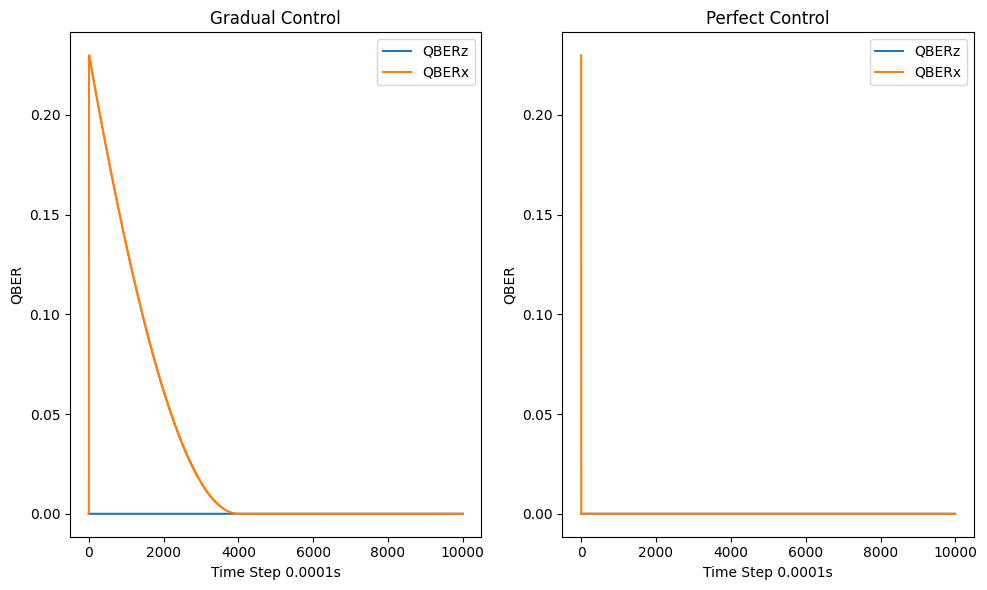

In [13]:
env.fixed_error_ctrl_pump = [1, 0, 0, 0]
env.fixed_error_ctrl_alice = [0, 0, 0, 0]
env.fixed_error_ctrl_bob = [0, 0, 0, 0]
env.fixed_errors_flags = [True, True, True, True, 
                          True, True, True, True, 
                          True, True, True, True]

env.reset()

ctrl_pump = np.array(env.fixed_error_ctrl_pump)*-1

while not env.done:    
    env.step(a_pump=ctrl_pump)

QBER = env.get_qber()

env.reset()
interpolated_ctrl = np.linspace(0, ctrl_pump[0], num=1000)
i = 0
while not env.done:
    if i < len(interpolated_ctrl):
        env.step(a_pump=np.array([interpolated_ctrl[i], 0, 0, 0]))
        i += 1
    else:
        env.step(a_pump=ctrl_pump)

QBER2 = env.get_qber()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].title.set_text('Gradual Control')
axs[0].plot(QBER2[:, 0], label='QBERz')
axs[0].plot(QBER2[:, 1], label='QBERx')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('QBER')
axs[0].set_xlabel(f'Time Step {env.delta_t}s')

axs[1].title.set_text('Perfect Control')
axs[1].plot(QBER[6:, 0], label='QBERz')
axs[1].plot(QBER[6:, 1], label='QBERx')
axs[1].legend(loc='upper right')
axs[1].set_ylabel('QBER')
axs[1].set_xlabel(f'Time Step {env.delta_t}s')

plt.tight_layout()
plt.show()


100%|██████████| 12/12 [00:47<00:00,  3.95s/it]


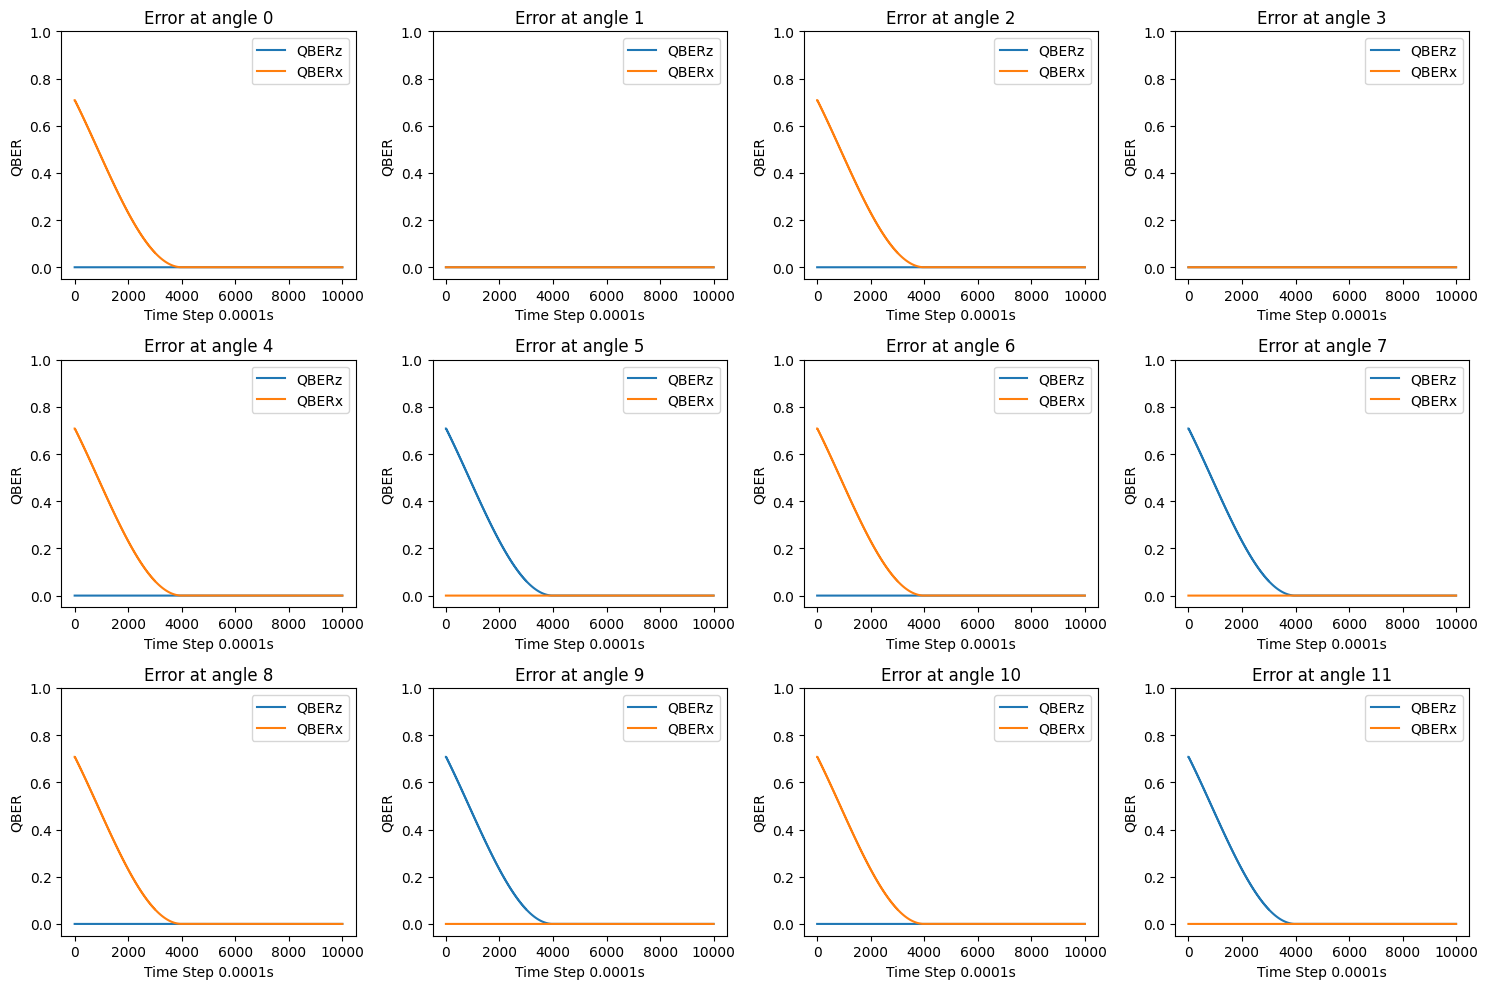

In [8]:
env.fixed_errors_flags = [True, True, True, True, 
                        True, True, True, True, 
                        True, True, True, True]

env.max_t = 1
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for i in tqdm(range(12)):
    env.fixed_error_ctrl_pump = [0,0,0,0]
    env.fixed_error_ctrl_alice = [0,0,0,0]
    env.fixed_error_ctrl_bob = [0,0,0,0]
    
    if i < 4:
        env.fixed_error_ctrl_pump[i] = 2
    if i >= 4 and i < 8:
        env.fixed_error_ctrl_alice[i%4] = 2
    if i >= 8:
        env.fixed_error_ctrl_bob[i%8] = 2

    ctrl = np.concatenate((env.fixed_error_ctrl_pump, env.fixed_error_ctrl_alice, env.fixed_error_ctrl_bob), axis=0)*-1
    
    interpolated_arrays = []
    for j in range(len(ctrl)):
        interpolated_array = np.linspace(0, ctrl[j], num=1000)
        interpolated_arrays.append(interpolated_array)
    env.reset()

    j = 0
    while not env.done:
        ctrl_true = ctrl.astype(float)
        ctrl_true[i] = interpolated_arrays[i][j]
        env.step(a_pump=ctrl_true[0:4], a_alice=ctrl_true[4:8], a_bob=ctrl_true[8:12])
        
        if j < len(interpolated_arrays[i]) - 1:
            j += 1 

    QBER = env.get_qber()

    row = i // 4
    col = i % 4

    # start at 4 to avoid the initial reset values without control
    axs[row, col].plot(QBER[4:,0],label='QBERz')
    axs[row, col].plot(QBER[4:,1],label='QBERx')
    axs[row, col].legend(loc = 'upper right')
    axs[row, col].set_title(f'Error at angle {i}')
    axs[row, col].set_ylabel('QBER')
    axs[row, col].set_xlabel(f'Time Step {env.delta_t}s')
    axs[row, col].set_ylim([-0.05, 1])  # Set y-axis limits here

plt.tight_layout()
plt.show()


# Fixed Controll on All Angles

[1 1 1 1]


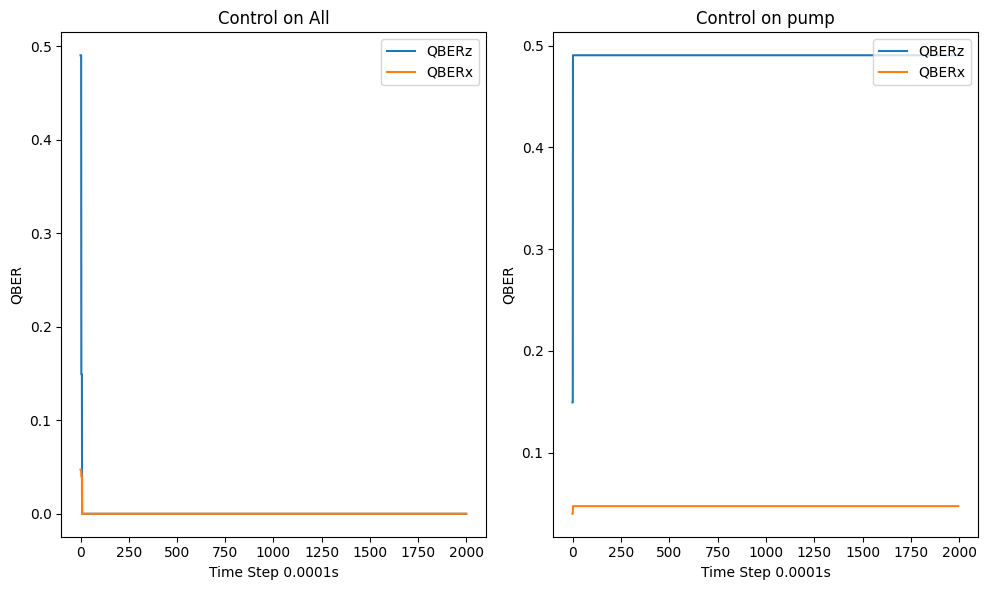

In [6]:
env.reset()
env.fixed_error_ctrl_pump = np.array([1, 1, 1, 1])
env.fixed_error_ctrl_alice = np.array([1, 1, 1, 1])
env.fixed_error_ctrl_bob = np.array([1, 1, 1, 1])
env.fixed_errors_flags = [True, True, True, True, 
                          True, True, True, True, 
                          True, True, True, True]

ctrl_pump = np.array(env.fixed_error_ctrl_pump)
ctrl_alice = np.array(env.fixed_error_ctrl_alice )
ctrl_bob = np.array(env.fixed_error_ctrl_bob)
print(ctrl_pump)
while not env.done:    
    env.step(a_pump=ctrl_pump)

QBER = env.get_qber()

env.reset()
interpolated_ctrl = np.linspace(0, -1, num=1000)
i = 0
while not env.done:
    env.step(a_pump=ctrl_pump, a_alice=ctrl_alice, a_bob=ctrl_bob)

QBER2 = env.get_qber()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].title.set_text('Control on All')
axs[0].plot(QBER2[:, 0], label='QBERz')
axs[0].plot(QBER2[:, 1], label='QBERx')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('QBER')
axs[0].set_xlabel(f'Time Step {env.delta_t}s')

axs[1].title.set_text('Control on pump')
axs[1].plot(QBER[6:, 0], label='QBERz')
axs[1].plot(QBER[6:, 1], label='QBERx')
axs[1].legend(loc='upper right')
axs[1].set_ylabel('QBER')
axs[1].set_xlabel(f'Time Step {env.delta_t}s')

plt.tight_layout()
plt.show()

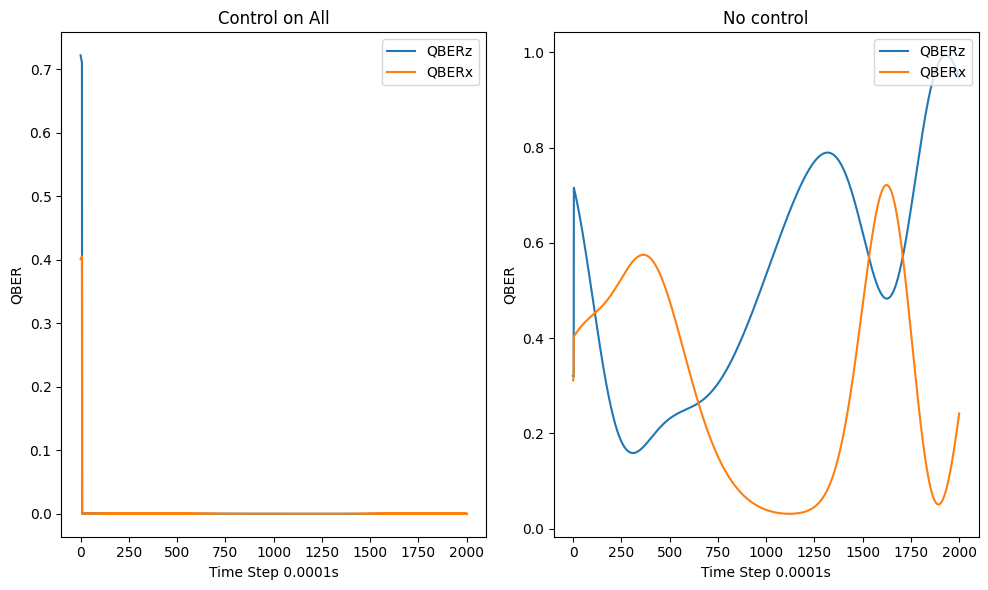

In [13]:
env.reset()
env.fixed_errors_flags = [True, True, True, True, 
                          True, True, True, True, 
                          True, True, True, True]
env.fixed_errors_flags = ~np.array(env.fixed_errors_flags, dtype=bool)

ctrl_pump = np.zeros(4)
ctrl_alice = np.zeros(4)
ctrl_bob = np.zeros(4)

while not env.done:    
    env.step()

QBER = env.get_qber()
PHI = env.get_phi()

env.reset()
i = 0
while not env.done:
    ctrl = env.get_phi()[-1]
    ctrl_pump = np.array(ctrl[0:4])
    ctrl_alice = np.array(ctrl[4:8])
    ctrl_bob = np.array(ctrl[8:12])
    env.step(a_pump=ctrl_pump, a_alice=ctrl_alice, a_bob=ctrl_bob)
    i += 1

QBER2 = env.get_qber()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].title.set_text('Control on All')
axs[0].plot(QBER2[:, 0], label='QBERz')
axs[0].plot(QBER2[:, 1], label='QBERx')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('QBER')
axs[0].set_xlabel(f'Time Step {env.delta_t}s')

axs[1].title.set_text('No control')
axs[1].plot(QBER[:, 0], label='QBERz')
axs[1].plot(QBER[:, 1], label='QBERx')
axs[1].legend(loc='upper right')
axs[1].set_ylabel('QBER')
axs[1].set_xlabel(f'Time Step {env.delta_t}s')

plt.tight_layout()
plt.show()